# Task1 Results: Classical TSP Experiments

This notebook presents experiments on the classical TSP problem defined in `task1_tsp.py`. 
I use the genetic algorithm (GA) via geatpy to find the shortest route visiting all 100 customers exactly once and returning to the start city.

## 1. Environment Setup

Below, I will import the necessary libraries and ensure that the `src` folder is in the Python path.

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# 常规库
import numpy as np

# Plotting
import matplotlib.pyplot as plt



## 2. Import the TSP solver function

I have implemented the classical TSP solution in `task1_tsp.py` within the `src/tasks` folder. 
I'll import and call the function `run_task1_tsp(...)` to solve the TSP problem.

Let's confirm the location of our data:
- `data/TSP.csv`

Then let's run a quick experiment with default parameters.

In [2]:
from src.tasks.task1_tsp import run_task1_tsp
tsp_file = os.path.abspath(os.path.join(module_path, "data", "TSP.csv"))
print("Using TSP file:", tsp_file)

Using TSP file: C:\Robbie\1 Program\1-2 COMP6707 ADVANCED COMPUTATIONAL INTELLIGENCE\COMP6707-Project\COMP6707_Project_24037513R\data\TSP.csv


### 2.1 Single Experiment with Default Parameters
I run one experiment with default `pop_size=100` and `max_gen=500`. 


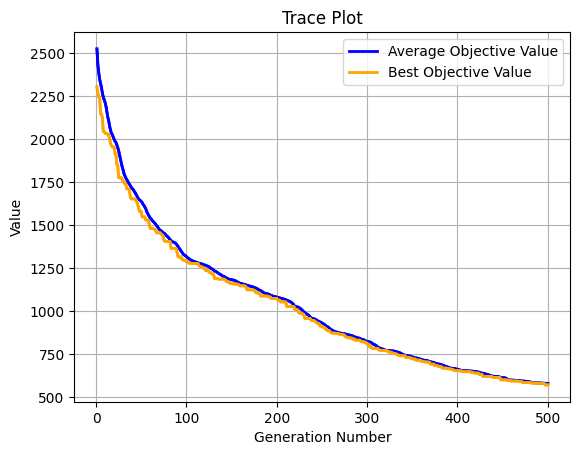

Execution time: 11.44460678100586 s
Evaluation number: 50000
The best objective value is: 572.4206605712143
The best variables are: 
45	36	73	83	60	98	85	17	28	48	39	10	74	51	95	43	62	27	97	34	22	35	18	13	3	99	63	5	93	66	41	91	86	71	16	4	31	30	38	55	70	25	69	9	33	32	53	44	12	67	61	21	57	2	6	19	42	0	72	37	82	24	54	50	76	46	1	89	96	26	52	15	59	77	11	65	40	68	87	81	29	90	75	79	64	20	92	84	56	23	47	88	58	80	7	49	78	14	8	94	
Best distance found: 572.4207
Best route (first 20 customers): [45 36 73 83 60 98 85 17 28 48 39 10 74 51 95 43 62 27 97 34] ...


In [4]:
result_1 = run_task1_tsp(tsp_file, pop_size=100, max_gen=500)

print(f"Best distance found: {result_1['best_distance']:.4f}")
print("Best route (first 20 customers):", result_1['best_route'][:20], "...")

**Analysis:**  
- We obtain a route and its total distance.  
- If we want to visualize the route, we can call the plotting function. 

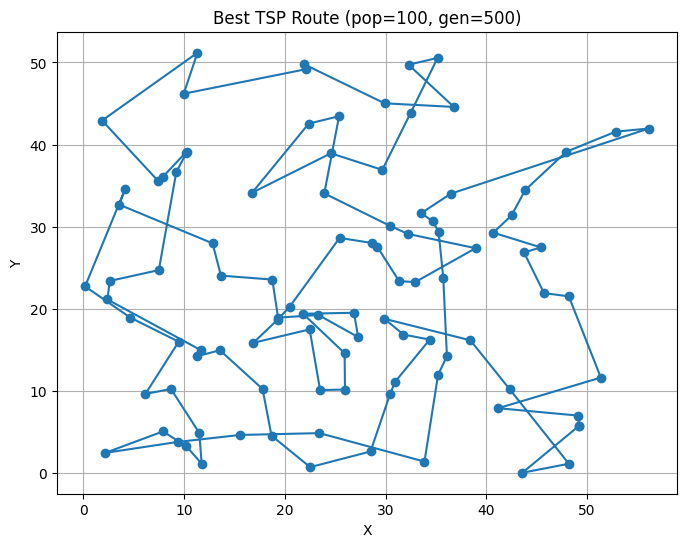

In [5]:
from src.utils.visualization import plot_tsp_route

coords = result_1['problem'].coords
plot_tsp_route(coords, result_1['best_route'], title="Best TSP Route (pop=100, gen=500)", show=True)

## 3. Parameter Sensitivity Study

Next, we can explore how changing the population size (`pop_size`) or the number of generations (`max_gen`) affects the solution quality. We'll do a small grid search:  
- pop_size in {50, 100, 150}  
- max_gen in {200, 500}

We will store results in a table for comparison.

Running TSP with pop_size=50, max_gen=200 ...


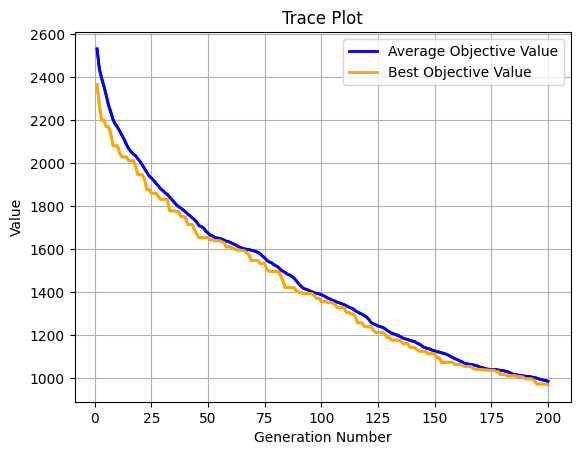

Execution time: 2.403589963912964 s
Evaluation number: 10000
The best objective value is: 967.5826580178913
The best variables are: 
47	58	92	91	71	16	35	5	63	3	50	46	1	76	34	42	6	48	94	17	72	9	7	79	30	18	13	97	89	27	96	52	26	95	65	40	68	81	87	39	28	80	78	49	60	29	19	2	15	77	11	59	43	10	51	98	37	21	57	82	0	67	44	25	64	69	54	74	62	61	70	41	86	38	22	99	24	85	8	73	36	14	45	83	90	33	32	53	20	12	4	93	66	55	31	75	88	56	23	84	
Running TSP with pop_size=50, max_gen=500 ...


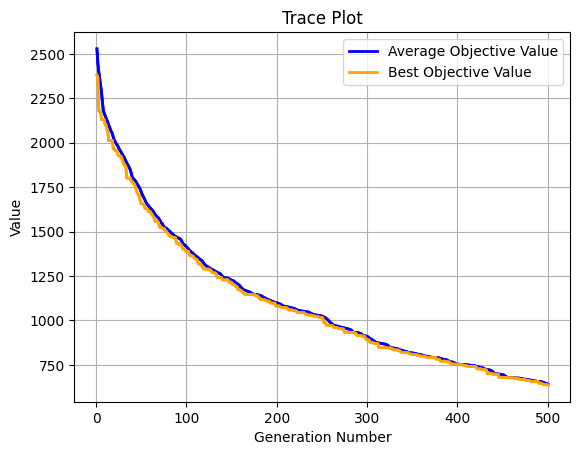

Execution time: 5.797364950180054 s
Evaluation number: 25000
The best objective value is: 637.0342761912317
The best variables are: 
8	83	45	73	36	81	39	6	19	72	0	98	85	32	75	58	49	78	9	47	88	20	25	79	64	12	55	38	93	91	66	63	99	5	3	13	18	35	22	46	76	1	97	27	50	30	31	70	44	53	33	69	37	57	42	24	54	34	89	96	62	95	43	21	67	82	61	51	74	68	15	59	65	26	52	40	11	77	10	87	2	28	48	90	29	14	94	7	92	4	16	41	86	71	23	56	84	80	17	60	
Running TSP with pop_size=100, max_gen=200 ...


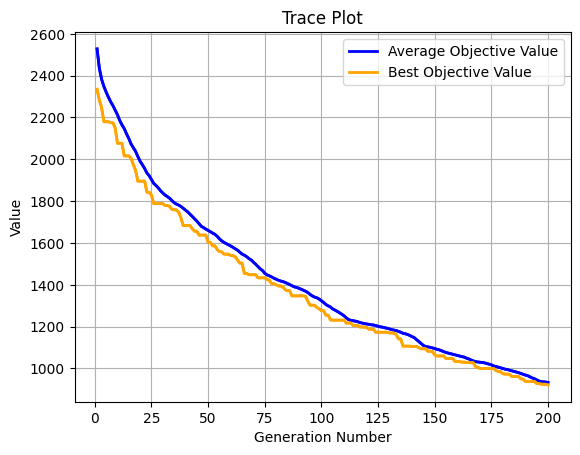

Execution time: 4.515095233917236 s
Evaluation number: 20000
The best objective value is: 921.3456864559007
The best variables are: 
80	23	91	92	33	90	8	83	28	25	79	58	20	55	31	66	93	38	63	5	3	22	99	13	18	76	97	89	27	1	50	30	35	34	46	54	62	15	52	11	59	77	40	65	68	19	48	2	98	0	57	37	85	32	12	16	71	86	41	44	42	47	56	84	88	64	61	67	70	4	9	75	17	45	29	49	78	7	87	81	60	14	94	73	36	39	21	43	95	96	26	74	10	6	51	82	72	24	53	69	
Running TSP with pop_size=100, max_gen=500 ...


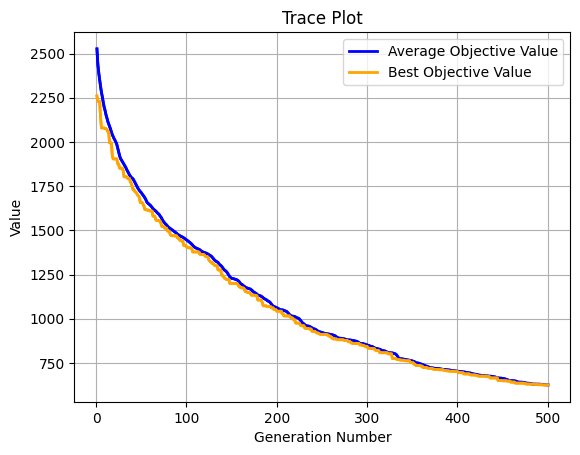

Execution time: 10.805067539215088 s
Evaluation number: 50000
The best objective value is: 625.2625278798339
The best variables are: 
50	54	67	42	0	33	75	7	58	88	92	64	53	32	69	44	25	20	16	55	66	93	63	5	99	3	18	35	38	41	91	86	71	23	56	84	47	80	78	49	90	17	85	72	57	61	37	19	2	39	87	10	81	28	98	12	24	82	21	95	96	43	62	51	74	68	77	11	65	59	40	26	89	52	15	6	48	29	36	8	83	73	94	45	14	60	9	79	4	31	70	30	22	13	76	46	1	27	97	34	
Running TSP with pop_size=150, max_gen=200 ...


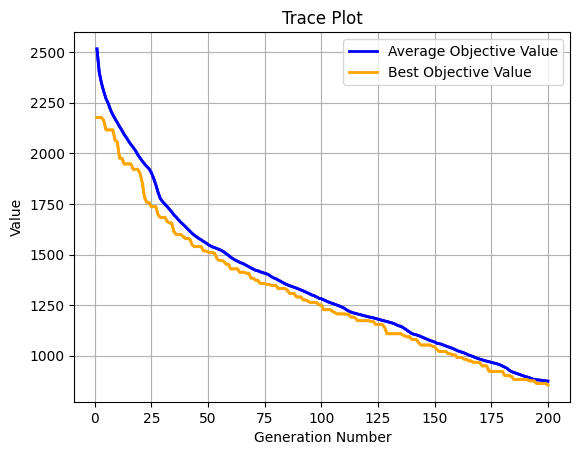

Execution time: 6.468993186950684 s
Evaluation number: 30000
The best objective value is: 855.5635627147989
The best variables are: 
0	57	72	50	97	1	63	41	55	93	30	70	25	44	53	92	49	7	9	71	66	22	38	79	64	33	98	29	17	85	75	78	80	83	45	94	14	60	90	8	36	73	81	61	4	31	86	91	16	56	84	23	47	88	58	20	69	12	42	37	19	82	95	51	74	87	24	21	52	26	43	62	40	59	15	10	28	48	39	2	68	77	65	11	96	27	89	34	76	18	35	5	99	13	3	46	54	67	6	32	
Running TSP with pop_size=150, max_gen=500 ...


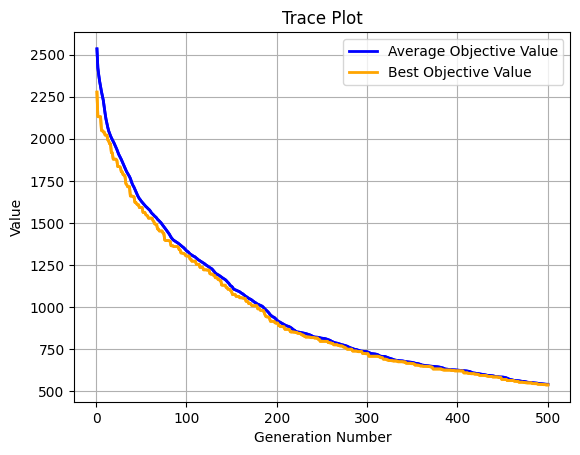

Execution time: 16.540006637573242 s
Evaluation number: 75000
The best objective value is: 537.7739963110721
The best variables are: 
14	78	49	80	88	47	23	56	84	9	7	58	60	83	29	90	28	48	2	6	0	32	33	75	85	17	98	19	72	37	12	25	4	31	70	30	35	18	76	46	50	22	13	3	99	5	63	93	66	38	55	71	86	91	41	16	92	20	79	64	69	44	53	57	82	61	42	67	24	54	34	27	97	1	89	26	65	52	43	62	96	21	95	51	15	11	40	77	59	68	74	10	87	39	81	8	36	73	45	94	


In [6]:
experiment_records = []
pop_sizes = [50, 100, 150]
max_gens = [200, 500]

for ps in pop_sizes:
    for mg in max_gens:
        print(f"Running TSP with pop_size={ps}, max_gen={mg} ...")
        res = run_task1_tsp(tsp_file, pop_size=ps, max_gen=mg)
        experiment_records.append({
            "pop_size": ps,
            "max_gen": mg,
            "best_distance": res["best_distance"]
        })


### 3.1 Summarize the results in a table

In [7]:
import pandas as pd
df_results = pd.DataFrame(experiment_records)
df_results

,pop_size,max_gen,best_distance
0,50,200,967.582658
1,50,500,637.034276
2,100,200,921.345686
3,100,500,625.262528
4,150,200,855.563563
5,150,500,537.773996


### 3.2 Quick Visualization

We can visualize how `best_distance` changes with different `(pop_size, max_gen)` pairs.


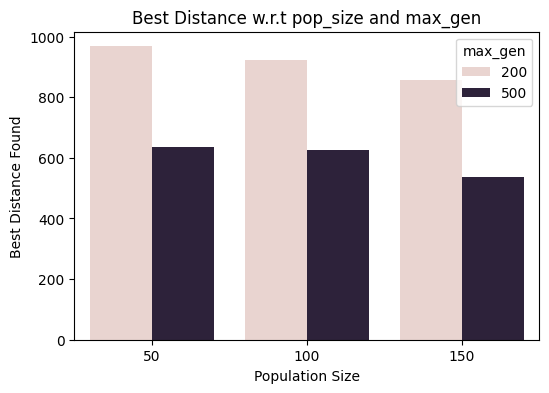

In [9]:
import seaborn as sns  # If you prefer matplotlib, that's fine, but here's a quick example

plt.figure(figsize=(6,4))
sns.barplot(data=df_results, x="pop_size", y="best_distance", hue="max_gen")
plt.title("Best Distance w.r.t pop_size and max_gen")
plt.xlabel("Population Size")
plt.ylabel("Best Distance Found")
plt.show()


## 4. Best Route Visualization per Parameter Setting

If we want to visually compare routes, we could store the route in each experiment and display or save them as needed. However, for brevity, let's just show one or two interesting cases.


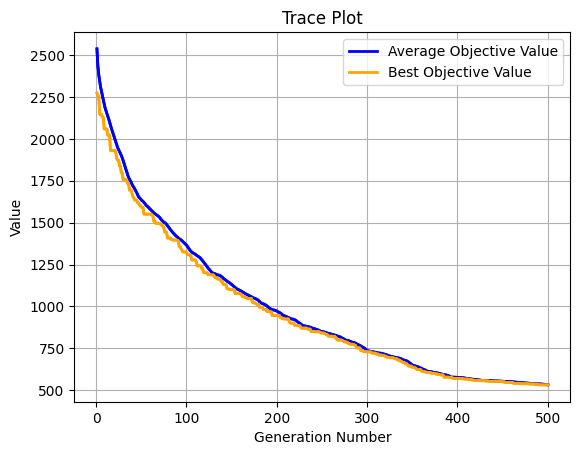

Execution time: 11.096115350723267 s
Evaluation number: 75000
The best objective value is: 531.6974477990499
The best variables are: 
8	45	94	81	48	6	87	39	10	74	68	59	65	26	11	40	77	15	52	43	62	95	96	89	27	97	1	13	3	46	76	22	35	18	99	5	63	93	66	38	30	50	34	54	61	37	57	82	21	51	2	19	72	98	85	28	29	90	60	17	33	75	0	42	67	24	12	44	32	20	79	64	69	25	53	70	4	31	55	91	16	41	86	71	56	84	23	47	88	58	92	9	7	80	78	49	14	73	36	83	
Best distance found with pop_size=150, max_gen=500: 531.6974


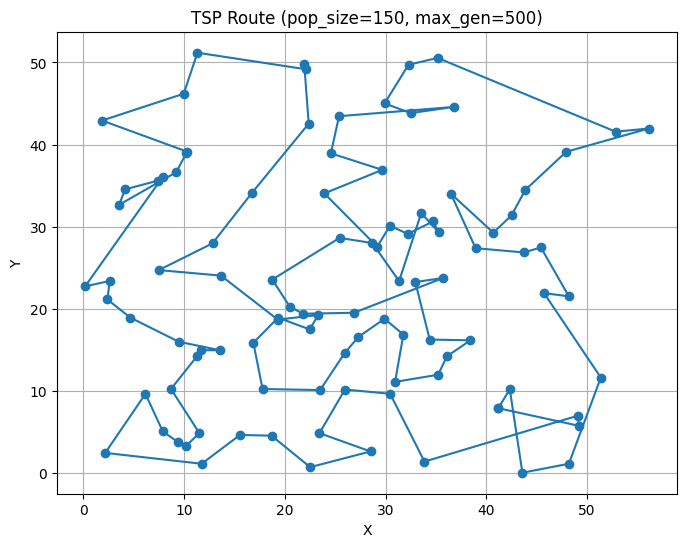

In [10]:
# Example: Show route for the largest pop_size and max_gen
ps_best = 150
mg_best = 500
res_big = run_task1_tsp(tsp_file, pop_size=ps_best, max_gen=mg_best)
print(f"Best distance found with pop_size={ps_best}, max_gen={mg_best}: {res_big['best_distance']:.4f}")
plot_tsp_route(res_big["problem"].coords, res_big["best_route"], 
               title=f"TSP Route (pop_size={ps_best}, max_gen={mg_best})", show=True)
